In [1]:
from tslearn.svm import TimeSeriesSVR
from tslearn.utils import to_time_series_dataset
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [12]:
TRAIN_TEST_SPLIT = 0.95
labels = ['PM2.5_pi', 'PM10_pi']

In [20]:
data = pd.read_csv('1h_1.csv')

In [21]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data = data.iloc[:1074,:]

In [22]:
data

,temp_pi_t0,hum_pi_t0,PM1_pi_t0,PM2.5_pi_t0,PM10_pi_t0,temp_pi_t1,hum_pi_t1,PM1_pi_t1,PM2.5_pi_t1,PM10_pi_t1,...,PM10_pi_t4,temp_pi_t5,hum_pi_t5,PM1_pi_t5,PM2.5_pi_t5,PM10_pi_t5,PM2.5_pi,PM10_pi,hour,loc
0,2.200000,67.791667,7.280000,14.491667,21.935833,2.458333,66.141667,6.643333,14.654167,23.088333,...,14.282500,25.128571,36.428571,4.015714,9.323571,14.962143,11.823333,17.340833,22.0,0.0
1,2.075000,69.941667,6.376667,11.823333,17.340833,2.200000,67.791667,7.280000,14.491667,21.935833,...,18.859333,24.350000,34.175000,2.905000,8.352500,14.282500,16.170000,24.518333,23.0,0.0
2,2.050000,71.791667,8.087500,16.170000,24.518333,2.075000,69.941667,6.376667,11.823333,17.340833,...,28.408333,6.480000,49.986667,5.054000,11.749333,18.859333,13.952500,21.710833,0.0,0.0
3,1.983333,69.816667,6.544167,13.952500,21.710833,2.050000,71.791667,8.087500,16.170000,24.518333,...,23.088333,3.066667,61.100000,7.343333,17.540833,28.408333,10.430833,15.020833,1.0,0.0
4,1.758333,69.583333,5.843333,10.430833,15.020833,1.983333,69.816667,6.544167,13.952500,21.710833,...,21.935833,2.458333,66.141667,6.643333,14.654167,23.088333,7.693333,11.190000,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,19.633333,36.091667,3.625000,9.433333,15.688333,20.070000,36.200000,2.704000,5.797000,9.036000,...,9.228000,21.416667,33.466667,2.684167,5.858333,9.194167,4.647273,6.926364,16.0,1.0
1070,18.481818,37.609091,2.420909,4.647273,6.926364,19.633333,36.091667,3.625000,9.433333,15.688333,...,9.993333,20.520000,34.980000,2.596000,5.820000,9.228000,8.526667,13.664167,17.0,1.0
1071,16.550000,50.075000,3.684167,8.526667,13.664167,18.481818,37.609091,2.420909,4.647273,6.926364,...,10.828182,20.108333,35.866667,2.847500,6.325833,9.993333,12.902500,20.120833,18.0,1.0
1072,14.775000,64.150000,6.013333,12.902500,20.120833,16.550000,50.075000,3.684167,8.526667,13.664167,...,9.036000,19.981818,35.990909,3.381818,7.029091,10.828182,6.644167,9.780833,19.0,1.0


In [23]:
n = int(TRAIN_TEST_SPLIT*data.shape[0])

X_train = data.iloc[:n,:]
X_test = data.iloc[n:,:]

y_train1 = X_train[labels[0]]
y_train2 = X_train[labels[1]]

y_true1 = X_test[labels[0]]
y_true2 = X_test[labels[1]]

X_train = X_train.drop(labels, axis=1)
X_test = X_test.drop(labels, axis=1)

In [20]:
X = to_time_series_dataset([[1, 2, 3, 4], [1, 2, 3], [2, 5, 6, 7, 8, 9]])
y = [0, 0, 1]

In [21]:
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train1 = np.array(y_train1)
y_train2 = np.array(y_train2)

y_true1 = np.array(y_true1)
y_true2 = np.array(y_true2)

In [24]:
X_train.shape

(1020, 32)

In [25]:
clf = TimeSeriesSVR(C=1.0, kernel="gak", n_jobs=-1)
clf.fit(X_train.values, y_train1)

TimeSeriesSVR(n_jobs=-1)

In [26]:
y_pred1 = clf.predict(X_test)

In [27]:
mse1 = mean_squared_error(y_true1, y_pred1)
mae1 = mean_absolute_error(y_true1, y_pred1)
print("MSE: {}".format(mse1))
print("MAE: {}".format(mae1))

MSE: 4.669970565923543
MAE: 1.754216515203557


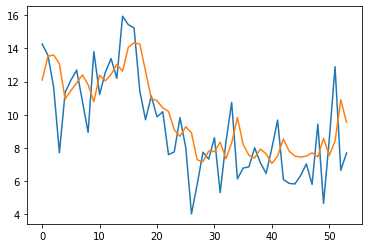

In [28]:
plt.plot(np.arange(len(y_true1)), y_true1)
plt.plot(np.arange(len(y_pred1)), y_pred1)
plt.show()